In [12]:
import actionet
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt

importlib.reload(actionet)


<module 'actionet' from '/Users/sebastian/Documents/git_projects/actionet-python/src/actionet/__init__.py'>

In [13]:
# adata = anndata.read_h5ad("../data/adata_agg_Hm_STR_MSN_1000plus_only_processed.h5ad")
actionet.compute_feature_specificity()

TypeError: compute_feature_specificity() missing 2 required positional arguments: 'adata' and 'labels'

In [3]:
actionet.preprocessing.filter_anndata(adata, min_cells_per_feat=0.01, inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4, inplace=True)
sc.pp.log1p(adata, base=2, copy=False)

In [4]:
actionet.reduce_kernel(adata, n_components=30, key_added='action', inplace=True)

Auto-selected IRLB for sparse matrix (72.5% sparse, 824,609,763 elements)
Computing reduced ACTION kernel:
Performing SVD using IRLB (sparse) -- A: 20109 x 41007
Kernel computed successfully.


In [5]:
# adata = actionet.correct_batch_effect(adata, batch_key='UID', reduction_key='action')
design = pd.get_dummies(pd.Series(adata.obs['UID'], dtype="category"), drop_first=False).to_numpy(dtype=float)
design

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(41007, 25))

In [6]:
actionet.correct_batch_effect(adata, design=design, reduction_key='action')
adata

Orthogonalizing batch effect:
	Deflating reduction ... done


AnnData object with n_obs × n_vars = 41007 × 20109
    obs: 'Dataset', 'Barcode', 'Sample_ID', 'UID', 'Donor', 'Region', 'Sex', 'Condition', 'Grade', 'Protocol', 'CellClass', 'MajorType', 'SubType', 'full_label', 'CellType'
    var: 'ENSEMBL', 'Gene', 'Chromosome', 'Biotype'
    uns: 'log1p', 'action_params', 'action_corrected_params'
    obsm: 'action', 'action_B', 'action_corrected', 'action_corrected_B'
    varm: 'action_V', 'action_A', 'action_corrected_V', 'action_corrected_A'

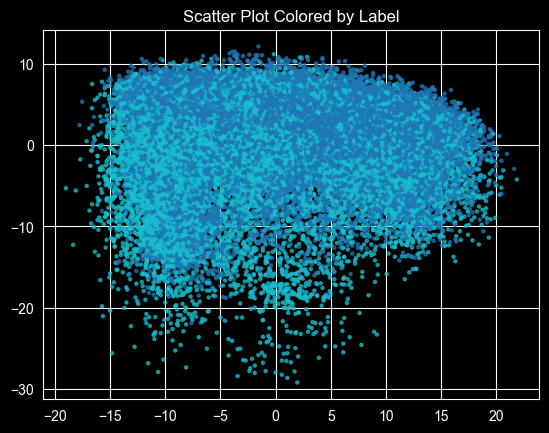

In [7]:
labels = adata.obs['CellType'].astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata.obsm['action'][:, 0],
    y=adata.obsm['action'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    alpha=0.7,
    s = 5
)
plt.title('Scatter Plot Colored by Label')
plt.show()

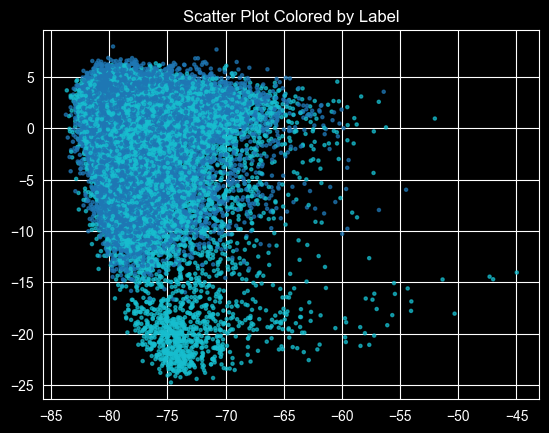

In [8]:
labels = adata.obs['CellType'].astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata.obsm['action_corrected'][:, 0],
    y=adata.obsm['action_corrected'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    alpha=0.7,
    s = 5
)
plt.title('Scatter Plot Colored by Label')
plt.show()

In [9]:
adata_org = actionet.run_actionet(adata, k_max=30, inplace=False, reduction_key='action', layout_epochs=200)
adata_cor = actionet.run_actionet(adata, k_max=30, inplace=False, reduction_key='action_corrected', layout_epochs=200)

Running ACTION decomposition...
Running ACTION (14 threads):
	Iterating from k = 2 ... 30: 29/29 finished= 2 ... 30: 23/29 finished
Joining trace of C & H matrices (depth = 30) ... done (464 archetypes)
Pruning archetypes:
	Non-specific archetypes: 0
	Unreproducible archetypes: 95
	Trivial archetypes: 10
Merging 359 archetypes:
Archetypes in merged set: 24
Building network...
Building adaptive network (density = 1.00)
	Building index ... done
	Identifying nearest neighbors ... done
	Constructing adaptive-nearest neighbor graph ... done
	Finalizing network ... done
Computing archetype footprints via diffusion...
Computing 2D UMAP layout...
Optimizing layout using method 'umap': 2 components 
UMAP embedding parameters a = 0.115, b = 1.929, gamma = 1.000
Optimizing for 200 epochs with 14 threads 
Computing 3D UMAP layout...
Optimizing with Adam:
	 alpha = 1.000,  beta1 = 0.500, beta2 = 0.900, eps = 1.000e-07
Optimization finished
Optimizing layout using method 'umap': 3 components 
UMAP e

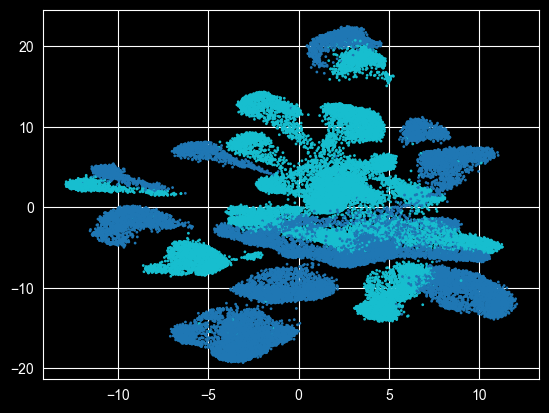

In [10]:
labels = pd.Series(adata_org.obs['CellType']).astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata_org.obsm['umap_2d_actionet'][:, 0],
    y=adata_org.obsm['umap_2d_actionet'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    s = 1
)
plt.show()

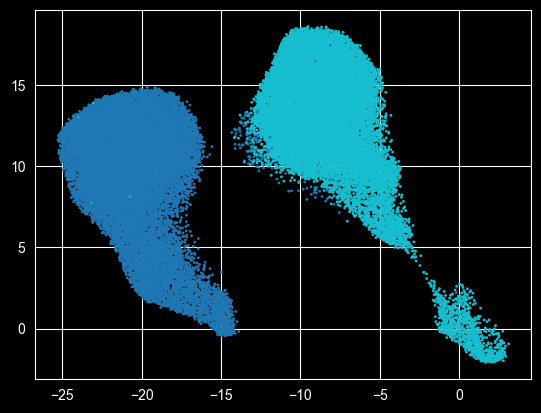

In [11]:
labels = pd.Series(adata_cor.obs['CellType']).astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata_cor.obsm['umap_2d_actionet'][:, 0],
    y=adata_cor.obsm['umap_2d_actionet'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    s = 1
)
plt.show()